# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import train_test_split

In [2]:
df_credit = pd.read_excel('GermanCredit.xlsx')
df_credit

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12
...,...,...,...
995,0,1987,24
996,0,2303,24
997,0,12680,21
998,0,6468,12


# 2. Check how many records do we have


In [3]:
df_credit.shape

(1000, 3)

# 3. Plot Histogram for column 'CreditAmount'

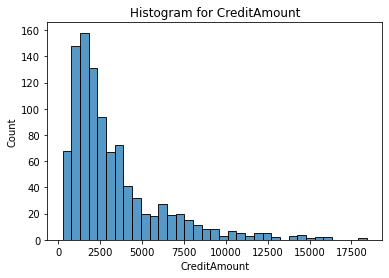

In [4]:
sns.histplot(df_credit['CreditAmount'])
plt.title('Histogram for CreditAmount')
plt.show()

In [5]:
amountIntervalsPoints = np.array([0, 500, 1000,1500,2000, 2500, 5000, 7500, 10000, 15000, 20000])
amountIntervals = [(amountIntervalsPoints[i] + int(i != 0), amountIntervalsPoints[i + 1]) for i in range(10)]
amountIntervals

[(0, 500),
 (501, 1000),
 (1001, 1500),
 (1501, 2000),
 (2001, 2500),
 (2501, 5000),
 (5001, 7500),
 (7501, 10000),
 (10001, 15000),
 (15001, 20000)]

# 3b. Create creditability dataframe

In [6]:
amountIntervalsDf = pd.DataFrame(amountIntervals, columns = ['intervalLeftSide', 'intervalRightSide'])
amountIntervalsDf

,intervalLeftSide,intervalRightSide
0,0,500
1,501,1000
2,1001,1500
3,1501,2000
4,2001,2500
5,2501,5000
6,5001,7500
7,7501,10000
8,10001,15000
9,15001,20000


In [7]:
#Credibility table preparation
Credibility0 = []
Credibility1 = []
for interval in amountIntervals:
    subData = df_credit[df_credit.CreditAmount >= interval[0]]
    subData = subData[subData.CreditAmount <= interval[1]]
    Credibility0.append(sum(subData.Creditability == 0))
    Credibility1.append(sum(subData.Creditability == 1))

In [8]:
credibility_df = pd.DataFrame(np.column_stack([Credibility0, Credibility1]), columns = ['Credibility0','Credibility1'])
credibility_df

,Credibility0,Credibility1
0,3,15
1,34,64
2,51,139
3,33,93
4,26,79
5,75,200
6,34,68
7,20,26
8,21,14
9,3,2


# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

In [9]:
compareCreditWorthinessDf = pd.concat([amountIntervalsDf.reset_index(drop=True), credibility_df], axis=1)
compareCreditWorthinessDf

,intervalLeftSide,intervalRightSide,Credibility0,Credibility1
0,0,500,3,15
1,501,1000,34,64
2,1001,1500,51,139
3,1501,2000,33,93
4,2001,2500,26,79
5,2501,5000,75,200
6,5001,7500,34,68
7,7501,10000,20,26
8,10001,15000,21,14
9,15001,20000,3,2


In [10]:
compareCreditWorthinessDf['total'] = compareCreditWorthinessDf.Credibility0 + compareCreditWorthinessDf.Credibility1
compareCreditWorthinessDf

,intervalLeftSide,intervalRightSide,Credibility0,Credibility1,total
0,0,500,3,15,18
1,501,1000,34,64,98
2,1001,1500,51,139,190
3,1501,2000,33,93,126
4,2001,2500,26,79,105
5,2501,5000,75,200,275
6,5001,7500,34,68,102
7,7501,10000,20,26,46
8,10001,15000,21,14,35
9,15001,20000,3,2,5


# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

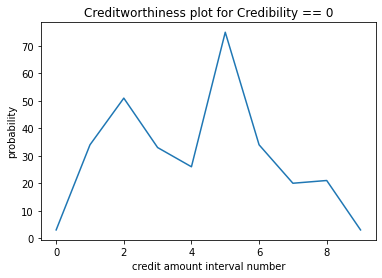

In [11]:
plt.plot(compareCreditWorthinessDf.Credibility0)
plt.xlabel('credit amount interval number')
plt.ylabel('probability')
plt.title("Creditworthiness plot for Credibility == 0")
plt.show()

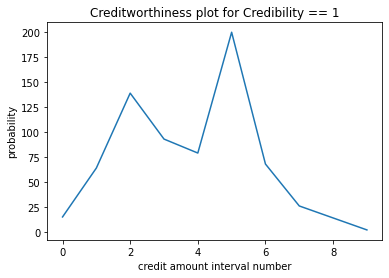

In [12]:
plt.plot(compareCreditWorthinessDf.Credibility1)
plt.xlabel('credit amount interval number')
plt.ylabel('probability')
plt.title("Creditworthiness plot for Credibility == 1")
plt.show()

# 6. Prepare input data for the model

In [13]:
X = np.array(df_credit.CreditAmount)
Y = df_credit.Creditability.astype('category')

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 10)

# 7. Fit logistic regression model

In [15]:
import statsmodels.api as sm

logit = sm.Logit( y_train, sm.add_constant( X_train ) )
lg = logit.fit()
lg.summary2()

Optimization terminated successfully.
         Current function value: 0.585145
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.026     
Dependent Variable: Creditability    AIC:              823.2034  
Date:               2022-04-04 16:24 BIC:              832.3056  
No. Observations:   700              Log-Likelihood:   -409.60   
Df Model:           1                LL-Null:          -420.61   
Df Residuals:       698              LLR p-value:      2.7106e-06
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const      1.3580     0.1320   10.2863   0.0000    1.0992    1.6167
x1        -0.0001     0.0000   -4.6516   0.0000   -0.0002   -0.0001
=================================================================

"""

# 8. Test accuracy calculation

In [16]:
def get_predictions( y_test, model ):
    y_pred_df = pd.DataFrame( { 'actual': y_test,"predicted_prob": lg.predict(sm.add_constant( X_test))})
    return y_pred_df

X_test[0:5]

array([1928, 2767, 1544, 1552, 2820], dtype=int64)

In [17]:
y_pred_df = get_predictions(X_test, lg )
y_pred_df['originalCredibility'] = np.array(y_test)
y_pred_df[0:5]

,actual,predicted_prob,originalCredibility
0,1928,0.749618,0
1,2767,0.727667,0
2,1544,0.759263,1
3,1552,0.759065,1
4,2820,0.726241,0


In [18]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map( lambda x: 1 if x > 0.6 else 0)
y_pred_df[0:10]

,actual,predicted_prob,originalCredibility,predicted
0,1928,0.749618,0,1
1,2767,0.727667,0,1
2,1544,0.759263,1,1
3,1552,0.759065,1,1
4,2820,0.726241,0,1
5,1190,0.767927,0,1
6,5842,0.637812,1,1
7,1278,0.765794,1,1
8,6187,0.626938,1,1
9,4795,0.669925,1,1


In [19]:
from sklearn.metrics import accuracy_score
print( 'Total Accuracy : ',np.round( accuracy_score( y_test, y_pred_df.predicted ),2))

Total Accuracy :  0.66


# 9. Build a confusion matrix

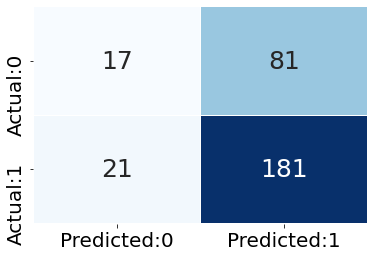

In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_df['predicted'])

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

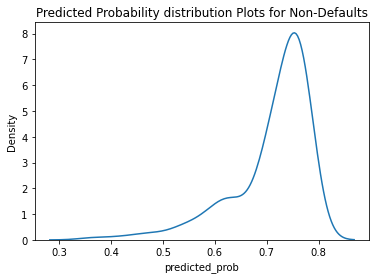

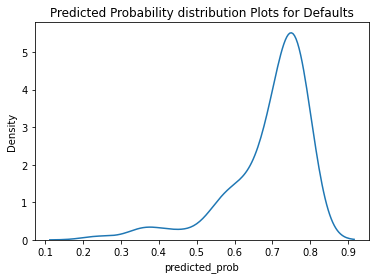

In [21]:
sns.kdeplot(y_pred_df[y_pred_df.originalCredibility == 1]["predicted_prob"])
plt.title('Predicted Probability distribution Plots for Non-Defaults')
plt.show()
sns.kdeplot(y_pred_df[y_pred_df.originalCredibility == 0]["predicted_prob"])
plt.title('Predicted Probability distribution Plots for Defaults')
plt.show()